## Load and visualize Intents Data
Loading the intends data and getting a sense of what's inside:

In [4]:
import json
import os
from pprint import pprint

# Set the correct path to the intents.json file
intents_path = os.path.join(os.pardir, 'chatbot', 'intents.json')

# Load the intents
with open(intents_path, 'r', encoding='utf-8') as file:
    intents = json.load(file)

# Display the content of intents
pprint(intents)


{'intents': [{'patterns': ['Hi there',
                           'How are you',
                           'Is anyone there?',
                           'Hey',
                           'Hola',
                           'Hello',
                           'Good day',
                           'Hey',
                           'Ekse',
                           'Hi'],
              'responses': ['Hi! I am CentBot, How can I help you?'],
              'tag': 'greeting'},
             {'patterns': ['Bye',
                           'See you later',
                           'Goodbye',
                           'Ok bye',
                           'Bye Bye'],
              'responses': ['See you!', 'Have a nice day', 'Sure Bye'],
              'tag': 'goodbye'},
             {'patterns': ['Thanks',
                           'Thank you',
                           "That's helpful",
                           'Awesome, thanks',
                           'Thanks for helping me'],
   

## Analyze Intents Distribution
Knowing how many patter are present per intent. To understand if some intents need more training samples:

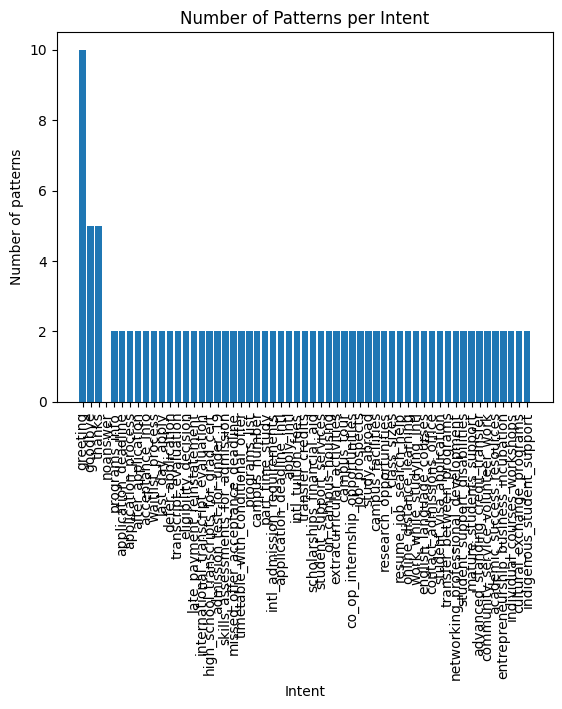

In [9]:
import matplotlib.pyplot as plt
import os

# Count patterns per intent
intent_counts = {intent['tag']: len(intent['patterns']) for intent in intents['intents']}

# Bar plot of the number of patterns per intent
plt.bar(intent_counts.keys(), intent_counts.values())
plt.xlabel('Intent')
plt.ylabel('Number of patterns')
plt.title('Number of Patterns per Intent')
plt.xticks(rotation=90)  # Rotate labels to avoid overlap

# Make sure the 'images' directory exists; if not, create it
if not os.path.exists('images'):
    os.makedirs('images')

# Save the plot to the desired folder
plt.savefig('images/intent_patterns.png', bbox_inches='tight', dpi=300)  # Adjust path as necessary

plt.show()


# Word Frequency Analysis
Getting a better idea of the vocabulary, creating a frequency distribution of the words accross all patterns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jbaru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


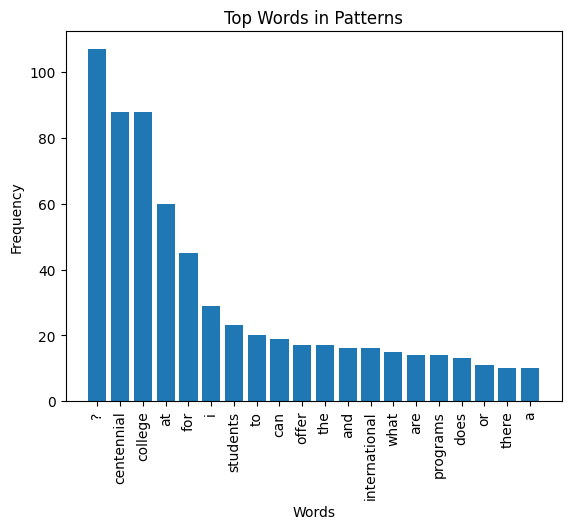

In [10]:
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize each pattern and count word frequencies
all_words = []
for intent in intents['intents']:
    for pattern in intent['patterns']:
        all_words.extend(word_tokenize(pattern.lower()))

word_freq = Counter(all_words)

# Most common words
common_words = word_freq.most_common(20)

# Plot word frequency
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words in Patterns')
plt.xticks(rotation=90)

# Make sure the 'images' directory exists; if not, create it
if not os.path.exists('images'):
    os.makedirs('images')

# Save the plot to the desired folder
plt.savefig('images/word_frequency_analisys.png', bbox_inches='tight', dpi=300)  # Adjust path as necessary

plt.show()


## Lemmatization Example
Show how lemmatization transforms the words to their base form:

In [7]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

# Apply lemmatization to the words
lemmatized_words = [lemmatizer.lemmatize(word) for word in all_words]

# Show the difference before and after lemmatization
comparison = list(zip(all_words, lemmatized_words))
pprint(comparison[:20])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jbaru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Jbaru\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[('hi', 'hi'),
 ('there', 'there'),
 ('how', 'how'),
 ('are', 'are'),
 ('you', 'you'),
 ('is', 'is'),
 ('anyone', 'anyone'),
 ('there', 'there'),
 ('?', '?'),
 ('hey', 'hey'),
 ('hola', 'hola'),
 ('hello', 'hello'),
 ('good', 'good'),
 ('day', 'day'),
 ('hey', 'hey'),
 ('ekse', 'ekse'),
 ('hi', 'hi'),
 ('bye', 'bye'),
 ('see', 'see'),
 ('you', 'you')]
